##### Importing Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 1. Introduction
The purpose of this report is to analyze the house rental market in Abu Dhabi, focusing on rental prices, property characteristics, and trends across neighborhoods.


##### Loading Data

In [79]:
db = pd.read_csv('rentals_3bedr_Abu_Dhabi_2.csv')

### 2. General Analysis
This section provides an overview of the dataset, including basic statistics about rental properties and their distribution.


### 3. Descriptive Statistics - Rental Prices & Property Characteristics
Statistical measures such as mean, median, and standard deviation for rental prices, sizes.


In [80]:
print(db.head(), "\n")
print(db.info(), "\n")
print("Number of rows: ", len(db), "\n")
print("Maximum Price: ", db['Price'].max(), "\nMinimum Price: ", db['Price'].min(), "\n")

    Price  Nr Bedrooms  Nr Bathrooms                   Location  Size  \
0  130000            3             5   Al Khalidiyah, Abu Dhabi  2500   
1   60000            3             3   Al Khalidiyah, Abu Dhabi  1800   
2   80400            3             3   Al Khalidiyah, Abu Dhabi  1900   
3   78000            3             3   Al Khalidiyah, Abu Dhabi  2000   
4   60000            3             3   Al Khalidiyah, Abu Dhabi  1600   

  Unnamed: 5       City  
0       sqft  Abu Dhabi  
1       sqft  Abu Dhabi  
2       sqft  Abu Dhabi  
3       sqft  Abu Dhabi  
4       sqft  Abu Dhabi   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         322 non-null    int64  
 1   Nr Bedrooms   322 non-null    int64  
 2   Nr Bathrooms  321 non-null    float64
 3   Location      322 non-null    object 
 4   Size          322 non-null    int64 

### Plotting

counts stores the count for each bar

patches stores the rectangle of each bar

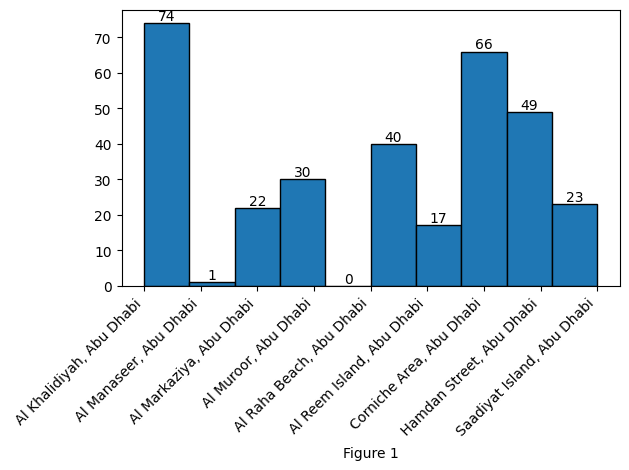

In [82]:
counts, bins, patches = plt.hist(db['Location'], bins=10, edgecolor='black')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, 
             counts[i],
             int(counts[i]),
             ha='center',
             va='bottom')

plt.xlabel('Figure 1')  # Add label at the bottom
plt.tight_layout()

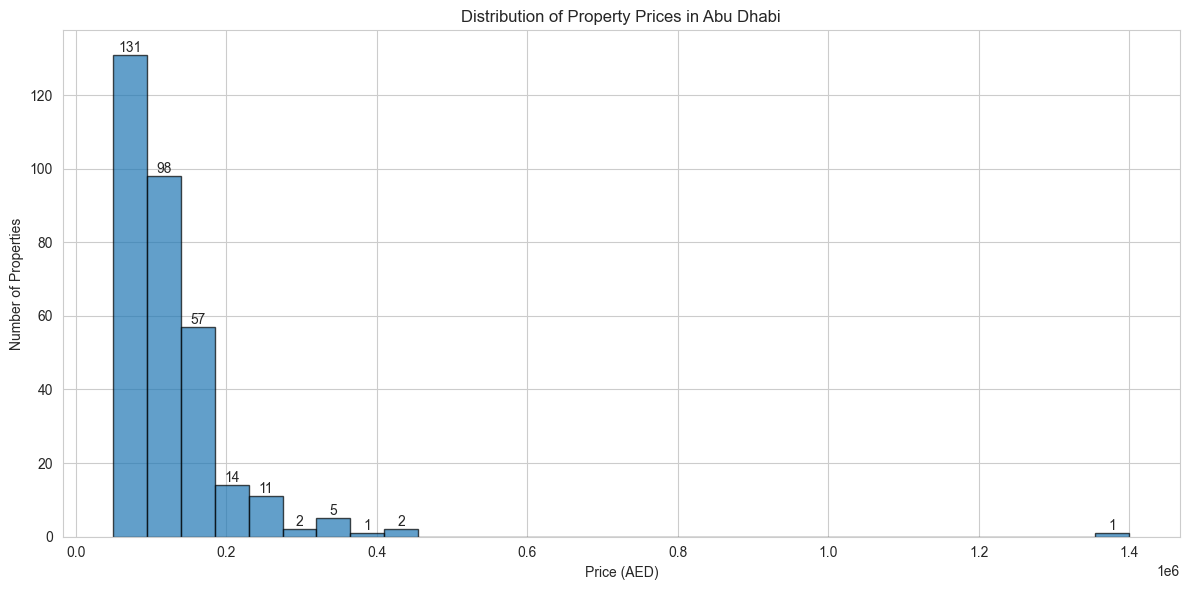

In [110]:
# Create figure with larger size
plt.figure(figsize=(12, 6))

# Create histogram with more bins for better detail
counts, bins, patches = plt.hist(db['Price'], bins=30, edgecolor='black', alpha=0.7)

# Add count labels on top of each bar
for i in range(len(patches)):
    if counts[i] > 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2,
                 counts[i],
             int(counts[i]),
             ha='center',
             va='bottom')

# Add labels and title
plt.xlabel('Price (AED)')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Prices in Abu Dhabi')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### 6. Box Plots
#### Rental Prices by Neighborhood
Visual representation of rental price ranges in each neighborhood.

#### Rental Prices by Property Type
Box plots to compare rental prices for different property types.


Location Statistics:
                           Price                               
                           count   mean    std     min      max
Location                                                       
 Al Khalidiyah, Abu Dhabi     74 101248  31103   55000   180000
 Al Manaseer, Abu Dhabi        1  85000    NaN   85000    85000
 Al Markaziya, Abu Dhabi      22 175873 276691   72500  1400000
 Al Muroor, Abu Dhabi         30  79667  19589   50000   125000
 Al Raha Beach, Abu Dhabi     40 156891  60710   80000   419999
 Al Reem Island, Abu Dhabi    17 133176  42061   85000   270000
 Corniche Area, Abu Dhabi     66 121167  38850   60000   220000
 Hamdan Street, Abu Dhabi     49  81428  19062   55000   150000
Saadiyat Island, Abu Dhabi    23 272826  68055  150000   430000


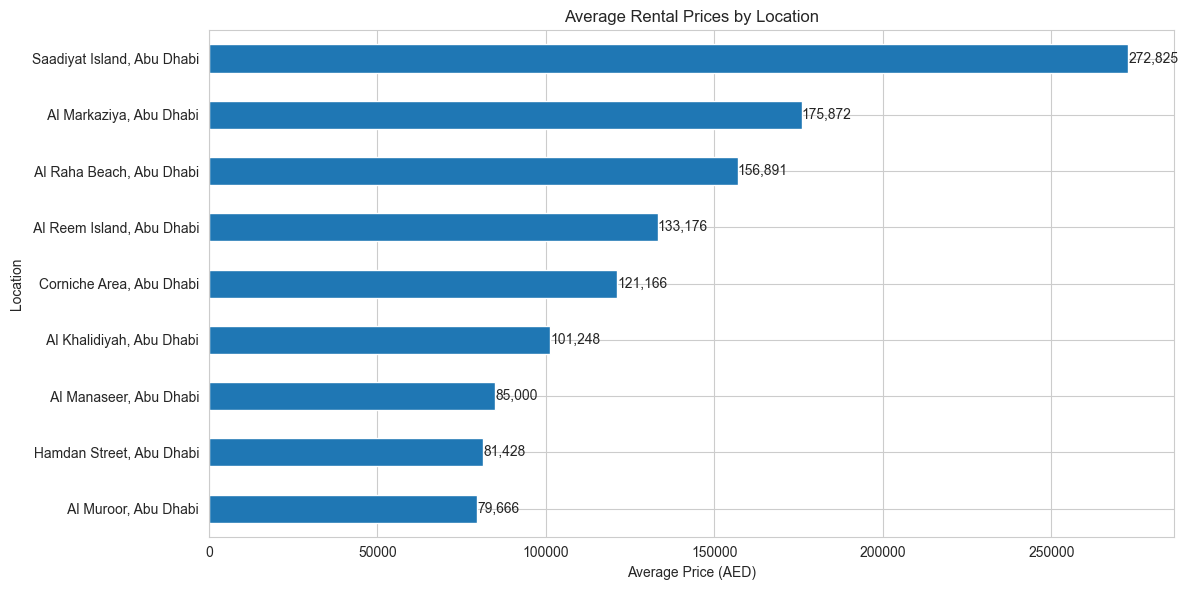

In [121]:
# Cell 1 - Bar Plot
plt.figure(figsize=(12, 6))

# Calculate mean prices by location
location_prices = db.groupby('Location')['Price'].mean().sort_values(ascending=True)

# Plot mean prices by location
location_prices.plot(kind='barh')
plt.title('Average Rental Prices by Location')
plt.xlabel('Average Price (AED)')
plt.ylabel('Location')

# Add price labels to the end of each bar
for i, v in enumerate(location_prices):
    plt.text(v, i, f'{int(v):,}', va='center')

# Calculate and print statistics
location_stats = db.groupby('Location').agg({
    'Price': ['count', 'mean', 'std', 'min', 'max']
}).round(2)
print("\nLocation Statistics:")
print(location_stats)

plt.tight_layout()
plt.show()

The white dots represent individual properties with rental prices that are unusually high or low compared to other properties in the same location.

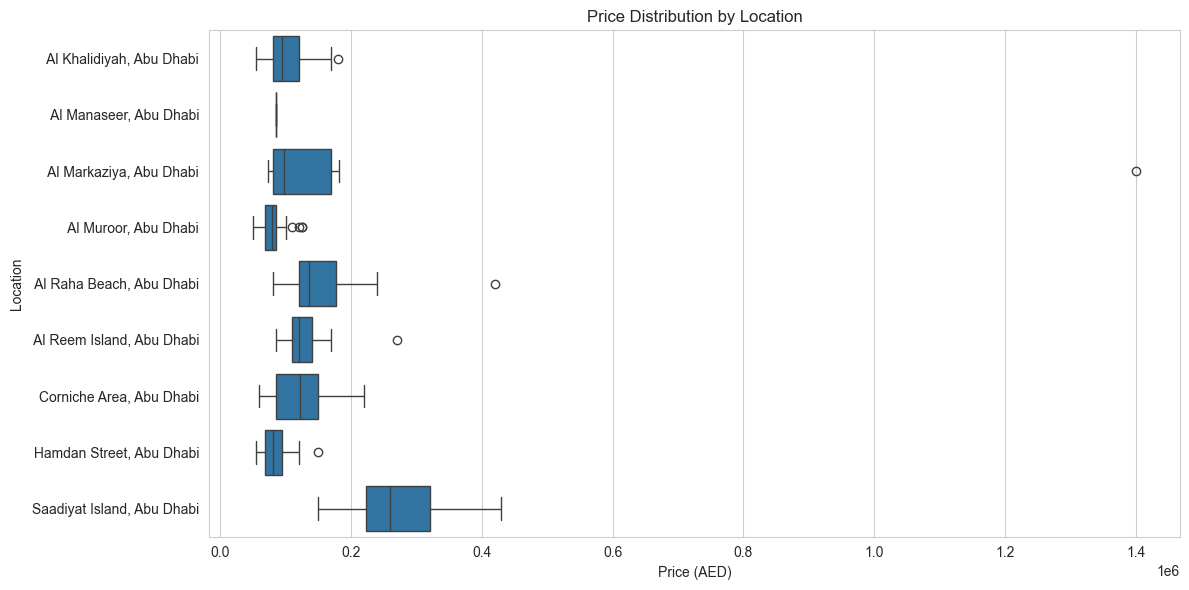

In [122]:
# Cell 2 - Box Plot
plt.figure(figsize=(12, 6))

# Create boxplot of prices by location
sns.boxplot(x='Price', y='Location', data=db)
plt.title('Price Distribution by Location')
plt.xlabel('Price (AED)')
plt.ylabel('Location')

plt.tight_layout()
plt.show()

### 7. Q-Q Plots
#### Rental Price Distribution
Assessing the normality of rental price distribution using Q-Q plots.

#### Property Size & Rental Prices
Analyzing the relationship between property size and rental prices.


C:\Users\Xxthe\AppData\Local\Temp\ipykernel_9120\2739860392.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_size = db.groupby(size_bins)['Price'].mean()


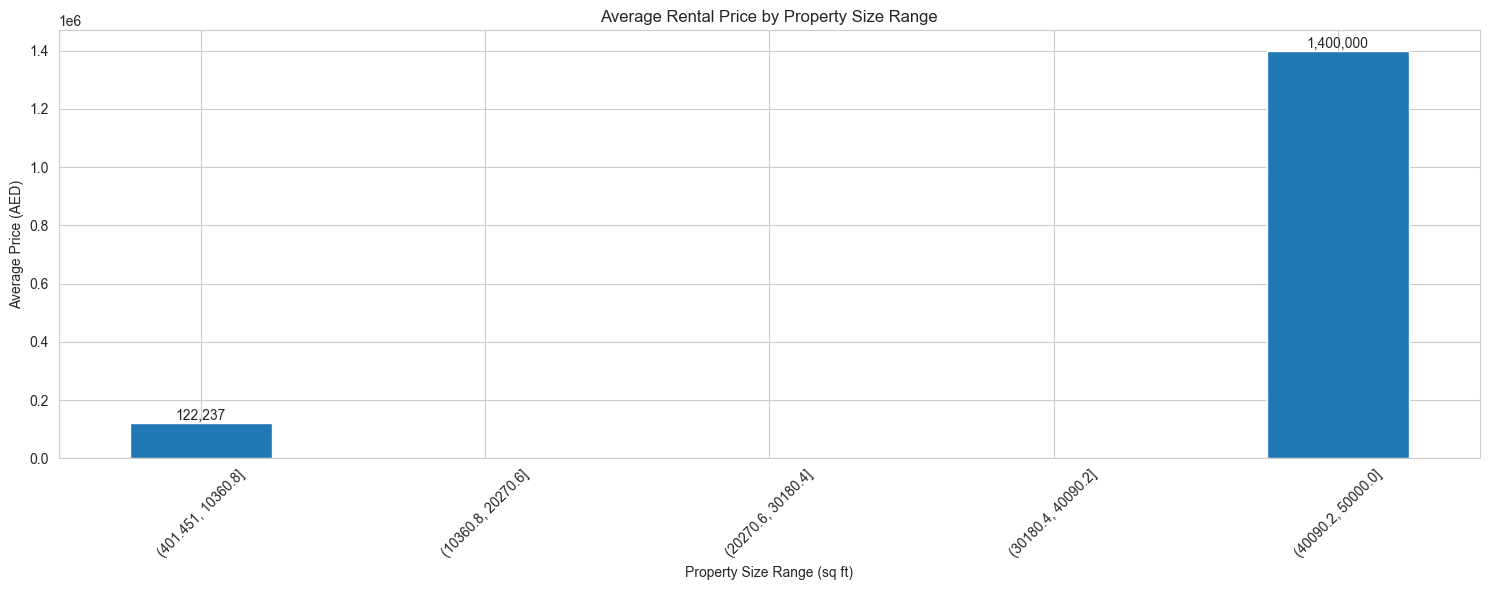

In [127]:
fig, ax1 = plt.subplots(figsize=(15, 6))

size_bins = pd.cut(db['Size'], bins=5)
avg_price_by_size = db.groupby(size_bins)['Price'].mean()

avg_price_by_size.plot(kind='bar', ax=ax1)
ax1.set_title('Average Rental Price by Property Size Range')
ax1.set_xlabel('Property Size Range (sq ft)')
ax1.set_ylabel('Average Price (AED)')
ax1.tick_params(axis='x', rotation=45)

# Add price labels on top of bars
for i, price in enumerate(avg_price_by_size):
    if not np.isnan(price):
        ax1.text(i, price, f'{int(price):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

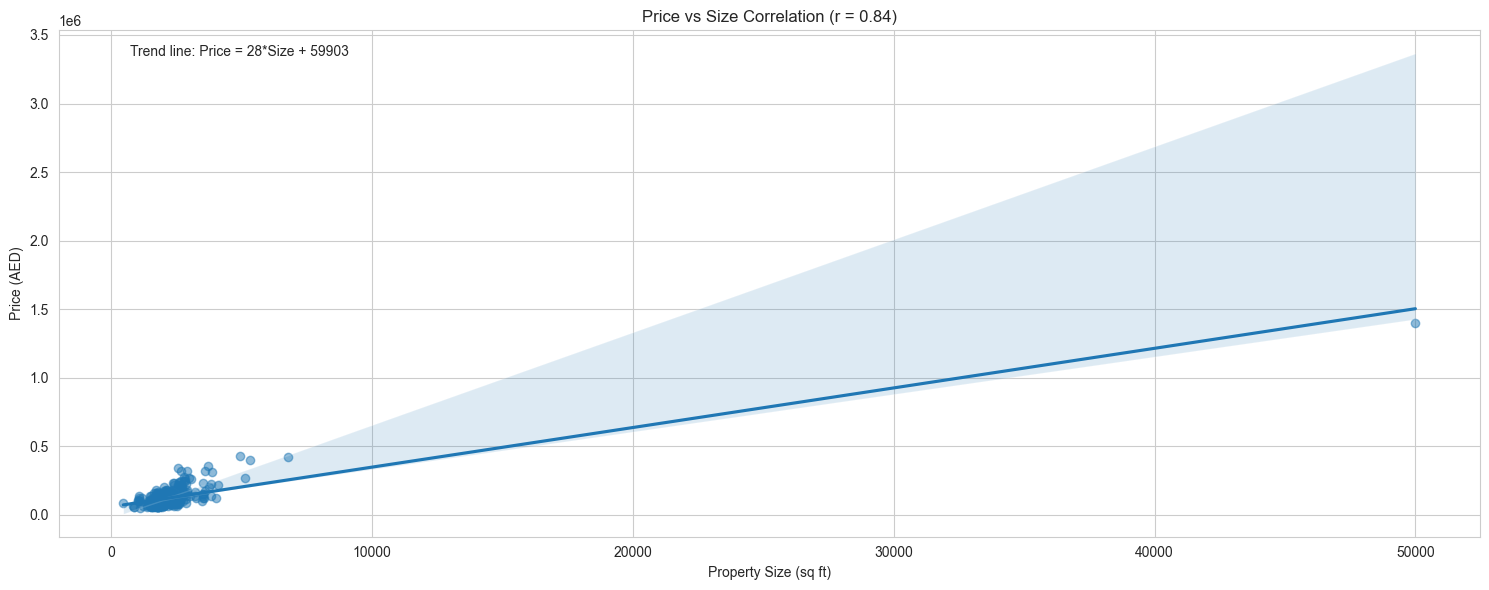

In [128]:
plt.figure(figsize=(15, 6))

# Calculate correlation coefficient
correlation = db['Size'].corr(db['Price'])

# Create scatter plot with regression line and correlation info
sns.regplot(x='Size', y='Price', data=db, scatter_kws={'alpha':0.5})
plt.title(f'Price vs Size Correlation (r = {correlation:.2f})')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Price (AED)')

# Add trend statistics
z = np.polyfit(db['Size'], db['Price'], 1)
p = np.poly1d(z)
trend_text = f'Trend line: Price = {int(z[0])}*Size + {int(z[1])}'
plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### 8. Price Distribution Analysis
#### Rental Prices across Categories (Apartments, Villas, etc.)
Analyzing price ranges for various property types.

#### Price Trends by Bedrooms & Size
Examining trends in rental prices based on the number of bedrooms and property size.


### 9. Confidence Intervals
Calculating confidence intervals for average rental prices across different neighborhoods and property types.


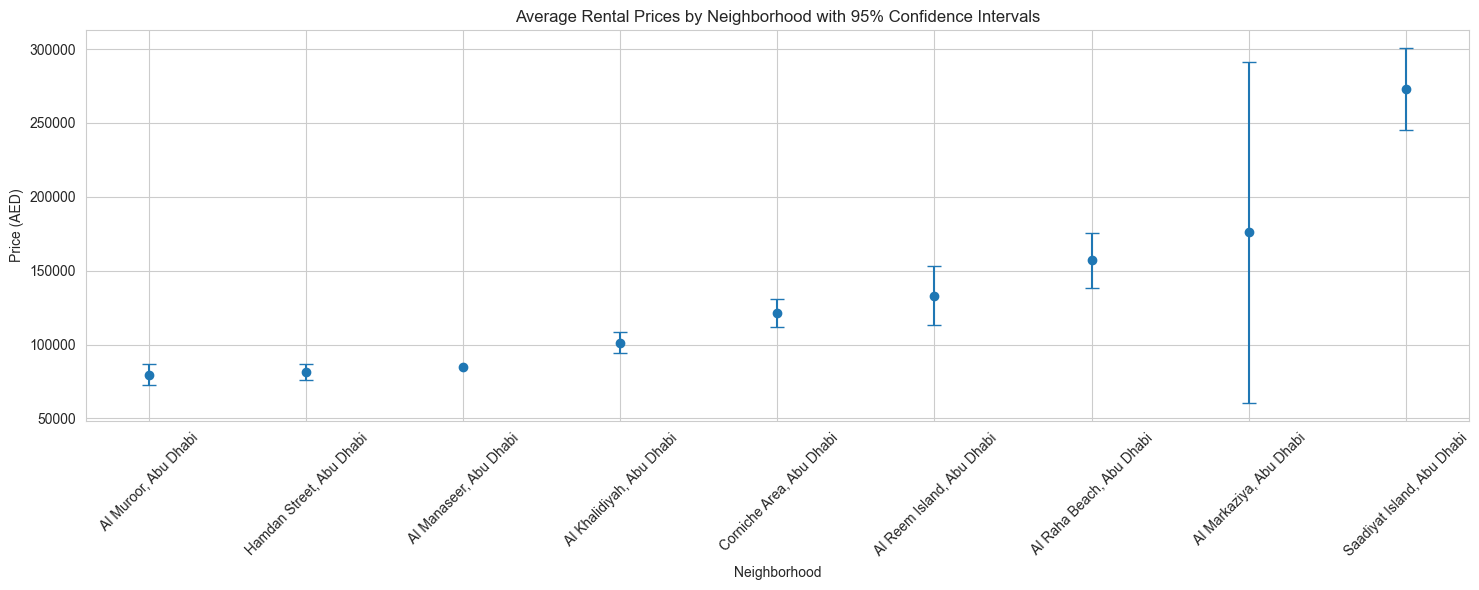

In [137]:
# Calculate confidence intervals for mean prices by neighborhood
neighborhood_stats = db.groupby('Location')['Price'].agg(['mean', 'count', 'std']).reset_index()
neighborhood_stats['ci'] = 1.96 * neighborhood_stats['std'] / np.sqrt(neighborhood_stats['count'])
neighborhood_stats['ci_lower'] = neighborhood_stats['mean'] - neighborhood_stats['ci'] 
neighborhood_stats['ci_upper'] = neighborhood_stats['mean'] + neighborhood_stats['ci']

# Create figure
plt.figure(figsize=(15, 6))

# Plot confidence intervals by neighborhood
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=True)
plt.errorbar(neighborhood_stats['Location'], neighborhood_stats['mean'], 
            yerr=neighborhood_stats['ci'], fmt='o', capsize=5)
plt.title('Average Rental Prices by Neighborhood with 95% Confidence Intervals')
plt.xlabel('Neighborhood')
plt.ylabel('Price (AED)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
